In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt

from utils.visualization import data_count_plot
from utils.duplicates import prepare_duplicates, visualize_duplicates

from utils import data

### Loading Dataframe

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading tables...
Loading tables/Eclectic...
Loading tables/Midcentury...
Loading tables/Craftsman...
Loading tables/Victorian...
Loading tables/Transitional...
Loading tables/Mediterranean...
Loading tables/Traditional...
Loading tables/Industrial...
Loading tables/Farmhouse...
Loading tables/Tropical...
Loading tables/Southwestern...
Loading tables/Beach...
Loading tables/Modern...
Loading tables/Contemporary...
Loading tables/Rustic...
Loading tables/Scandinavian...
Loading tables/Asian...
Loading sofas...
Loading sofas/Eclectic...
Loading sofas/Midcentury...
Loading sofas/Craftsman...
Loading sofas/Victorian...
Loading sofas/Transitional...
Loading sofas/Mediterranean...
Loading sofas/Traditional...
Loading sofas/Industrial...
Loading sofas/Farmhouse...
Loading sofas/Tropical...
Loading sofas/Southwestern...
Loading sofas/Beach...
Loading sofas/Modern...
Loading sofas/Contemporary...
Loading sofas/Rustic...
Loading sofas/Scandinavian...
Loading sofas/Asian...
Loading lamps...
Loadi

In [3]:
df.describe()

,Width,Height,Ratio
count,90084.000000,90084.000000,90084.000000
mean,340.858399,340.857799,1.000001
std,32.691655,32.689232,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [4]:
df.head()

,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,tables/Eclectic/4029eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
1,tables/Eclectic/4107eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic
2,tables/Eclectic/3885eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
3,tables/Eclectic/4040eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
4,tables/Eclectic/4171eclectic-coffee-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic


### Histogram Plot

In [5]:
def plot_histogram(df, column_name, bins=20, title=None):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title or f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

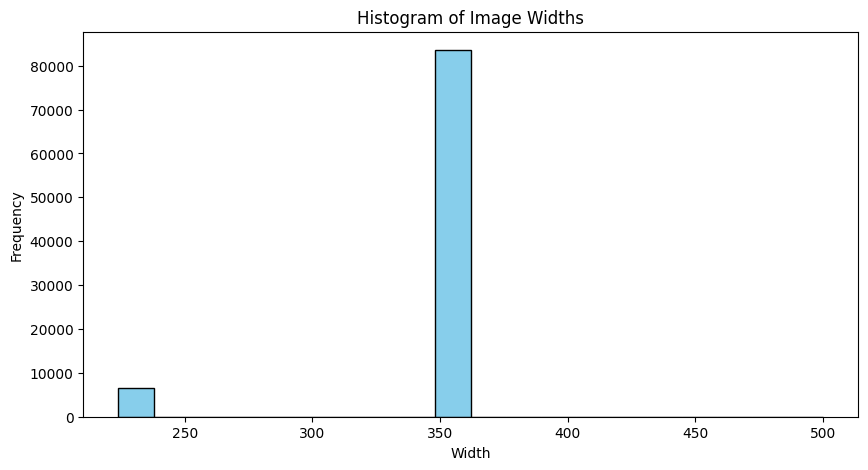

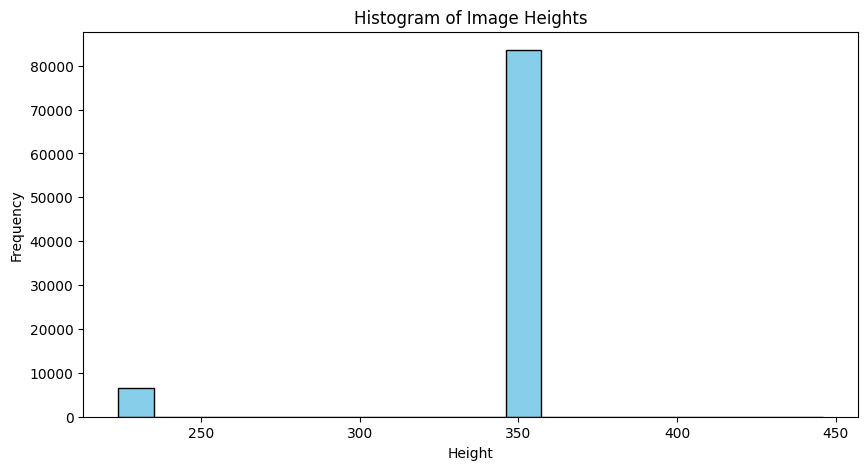

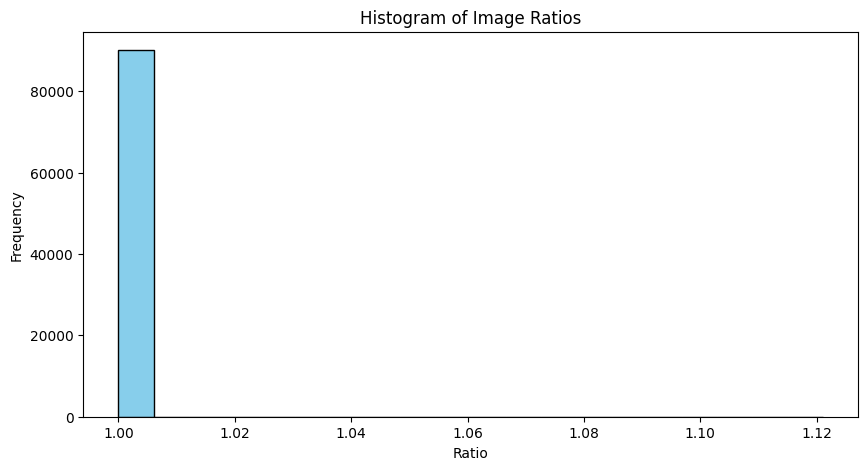

In [6]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

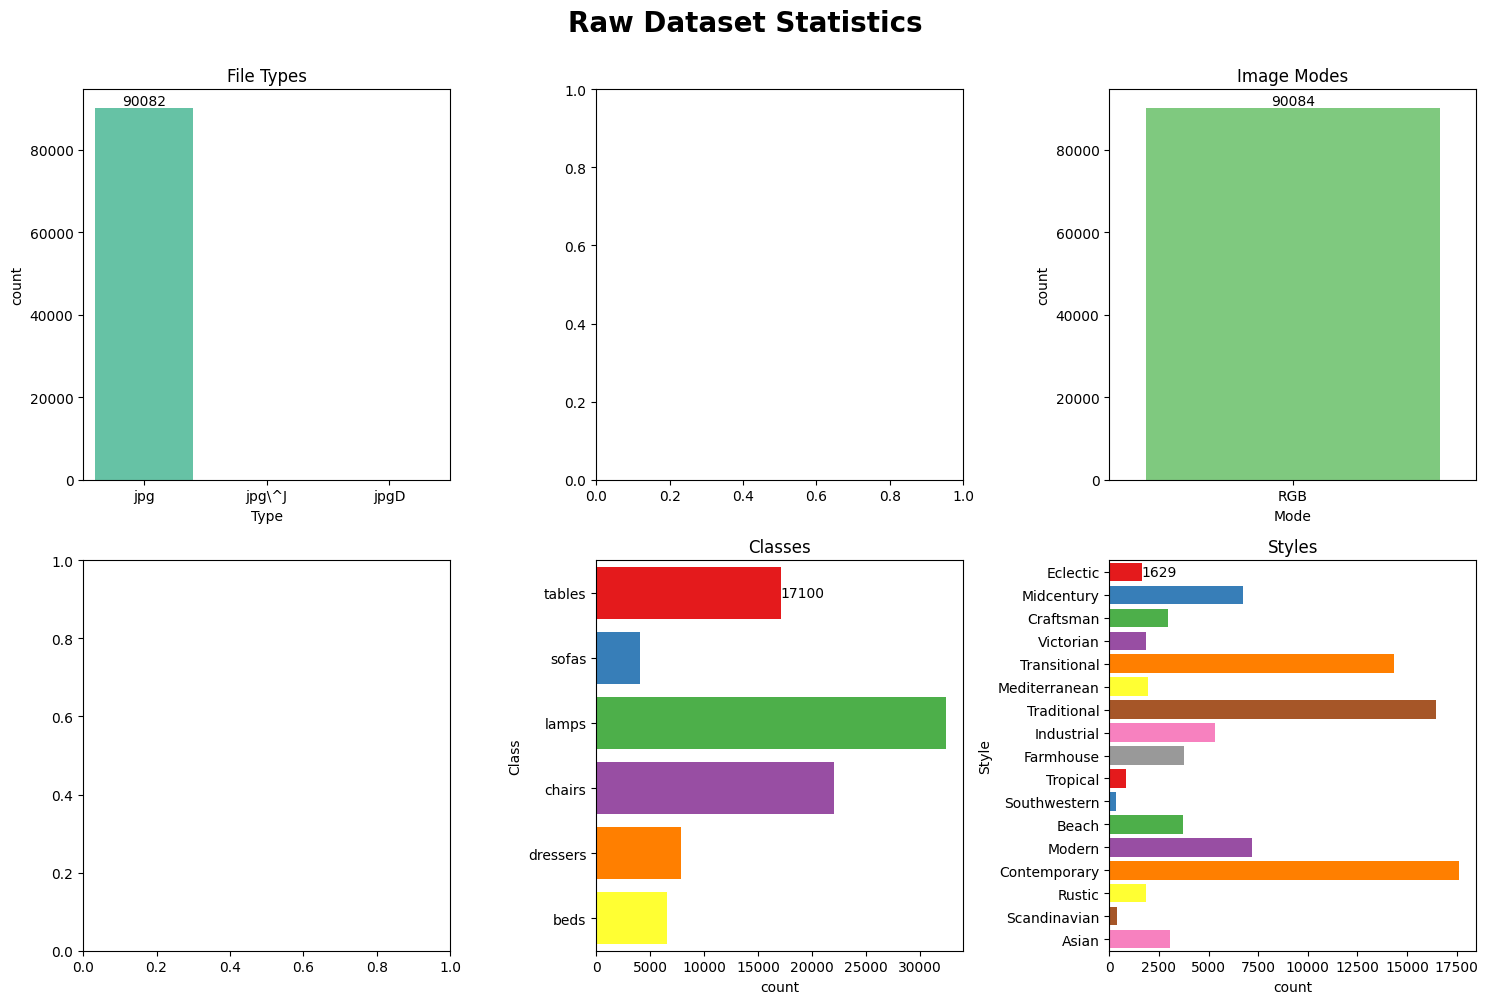

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', annotate=True, palette='Set2')
data_count_plot(df, 'Mode', ax=ax[0][2], title='Image Modes', annotate=True, palette='Accent')
data_count_plot(df, 'Class', ax=ax[1][1], horizontal=True, title='Classes', annotate=True, palette='Set1')
data_count_plot(df, 'Style', ax=ax[1][2], horizontal=True, title='Styles', annotate=True, palette='Set1')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

---
## Duplicate handling

In [8]:
duplicates = prepare_duplicates(df)

Calculating perceptual hash for all images...


Pandas Apply:   0%|          | 0/90084 [00:00<?, ?it/s]

Building approximate nearest neighbors using Annoy...
Identifying and grouping duplicates...


100%|██████████| 90084/90084 [00:01<00:00, 56575.45it/s]


Labelling duplicates group (non-duplicates are not included in result)...


100%|██████████| 84179/84179 [00:00<00:00, 6767856.70it/s]


Labelling duplicates type...


100%|██████████| 5684/5684 [00:07<00:00, 763.91it/s]


In [9]:
duplicates

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
13,1,Similar,tables/Eclectic/4592eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic,d66eaa646b913ae4e444e666b044e04647fa399b4fbb83...
6089,1,Similar,tables/Traditional/14267traditional-side-table...,jpg,350,350,1.0,RGB,tables,Traditional,d66eaa646b913ae4e444e666b044e04647fa399b4fbb83...
27,2,Similar,tables/Eclectic/3932eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,e6669cc669994cc963395999ce59199c867b39348cda63...
13888,2,Similar,tables/Contemporary/1965contemporary-side-tabl...,jpg,350,350,1.0,RGB,tables,Contemporary,e6669cc669994cc963395999ce59199c867b39348cda63...
43,3,Similar,tables/Eclectic/4188eclectic-console-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic,deaf2f54215817eabd42997f9da394b796d7c21dc268ca...
...,...,...,...,...,...,...,...,...,...,...,...
88865,5682,Similar,beds/Contemporary/8contemporary-bunk-beds.jpg,jpg,224,224,1.0,RGB,beds,Contemporary,eabf8eb5b54462f7940cc40a99d77b12d0f0f00c97cba3...
89846,5683,Duplicate,beds/Rustic/8945rustic-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Rustic,baab9c4fc4446bb107fe73ea95ea69b5dc40e712d29cb5...
89796,5683,Duplicate,beds/Rustic/4754rustic-bed.jpg,jpg,350,350,1.0,RGB,beds,Rustic,baab9c4fc4446bb107fe73ea95ea69b5dc40e712d29cb5...
90074,5684,Duplicate,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian,eebf74aae9053ad5d568240597c2e14a3fcf97a3c2d52f...


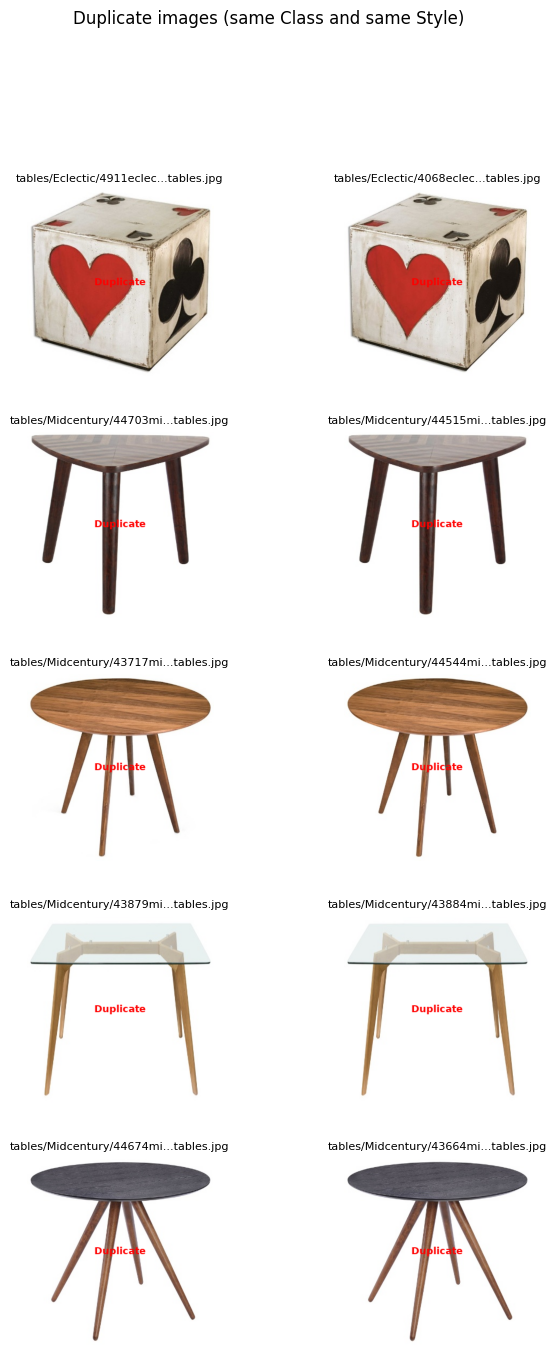

In [10]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Duplicate"], title="Duplicate images (same Class and same Style)")

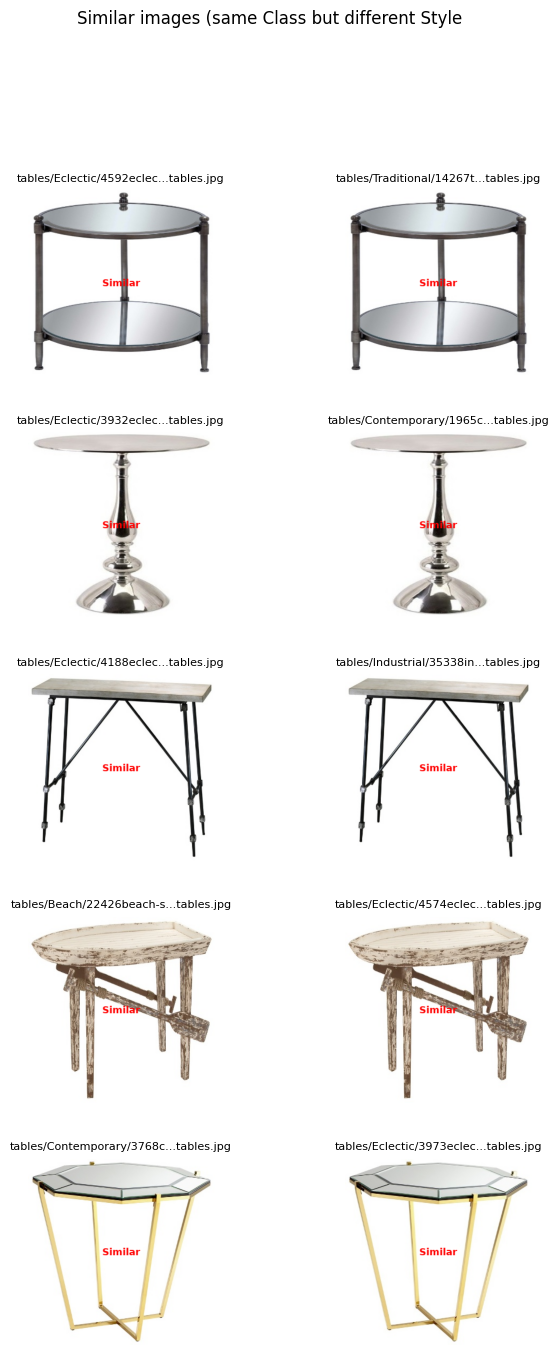

In [11]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Similar"], title="Similar images (same Class but different Style)")

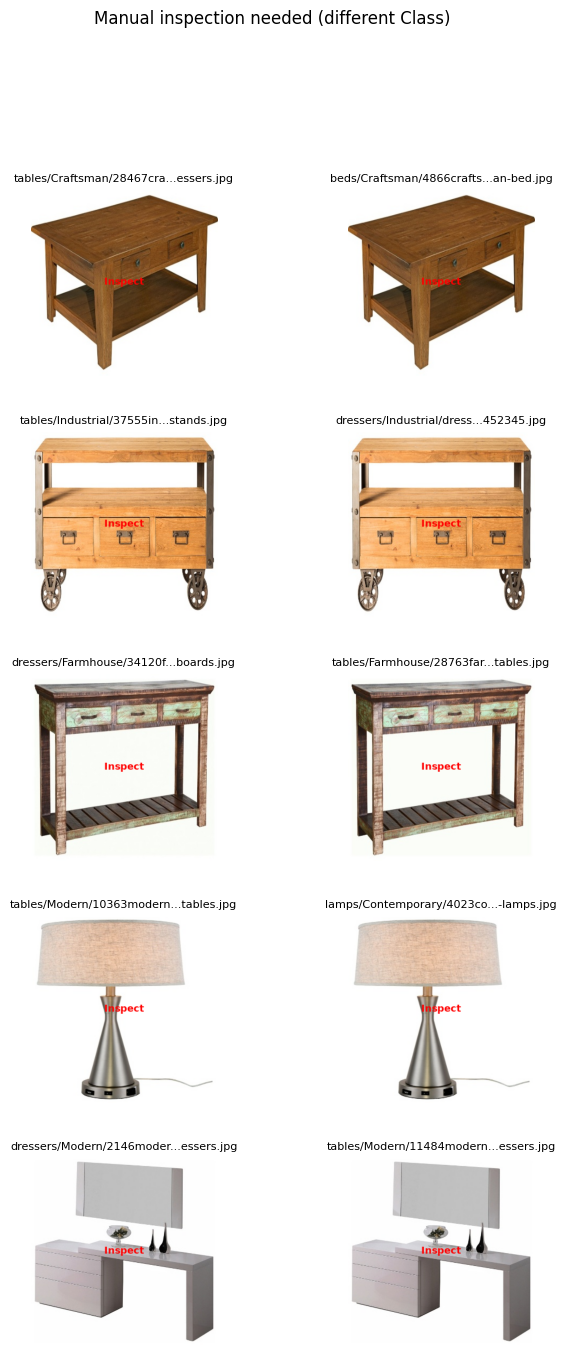

In [12]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Inspect"], title="Manual inspection needed (different Class)")

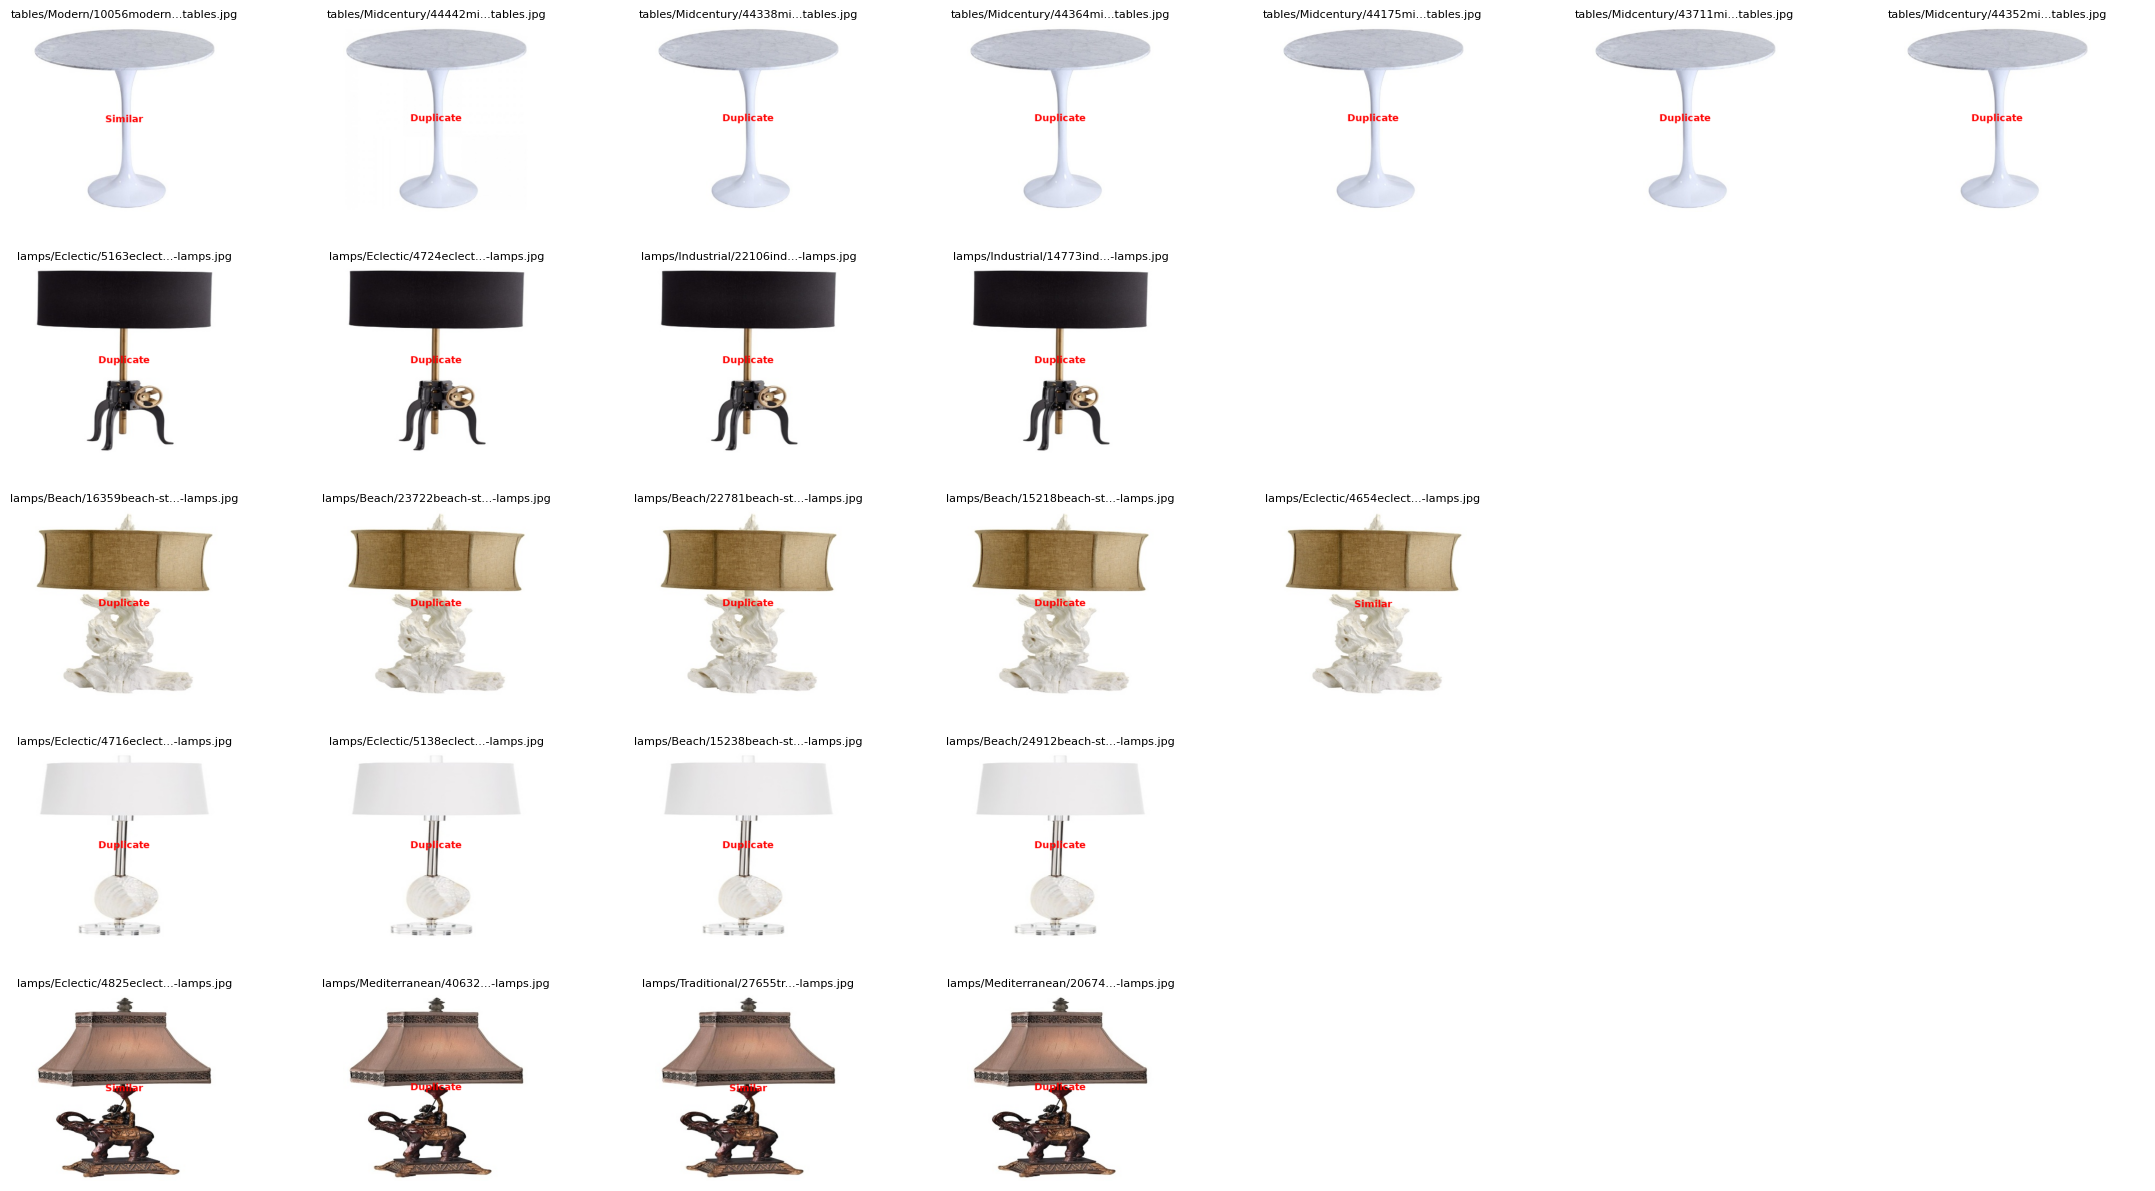

In [13]:
multiple_duplicates = duplicates[duplicates.groupby('Group')['Group'].transform('count') > 3]
visualize_duplicates(multiple_duplicates)